# Neural Networks

In [ ]:
Watch this video:

<iframe width="560" height="315" src="https://www.youtube.com/embed/aircAruvnKk" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
<hr>

:::{admonition} Assignments:
:class: hint

1. *Individual* -- Find a real-life business application of neural networks
2. *Team* -- Gather all applications and discuss what the shared characteristics are
3. *Team* -- Develop a concept for a new application that is based on neural networks
:::

## An example

We will start with a regression problem where we know the model. We'll generate some outcomes and investigate how well the computer can recreate the model based on some data set with examples. But first we need to install some packages we will need during this chapter.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


The model we are trying to recreate is defined by the following function.

$$
   f:\mathbb R \to \mathbb R, \ y = 2x^2 - \frac{1}{3}x^3
$$

Such a function transform some input values $x_1, x_2, .... x_N$ into corresponding values $y_1, y_2, .... y_N$. Let's calculate 25 values between -2 and +4:

In [4]:
def f(x):
    return 2 * x ** 2- x ** 3 / 3

x = np.linspace(-2, 4, 25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [5]:
y = f(x)
y

array([10.66666667,  7.91145833,  5.625     ,  3.77604167,  2.33333333,
        1.265625  ,  0.54166667,  0.13020833,  0.        ,  0.11979167,
        0.45833333,  0.984375  ,  1.66666667,  2.47395833,  3.375     ,
        4.33854167,  5.33333333,  6.328125  ,  7.29166667,  8.19270833,
        9.        ,  9.68229167, 10.20833333, 10.546875  , 10.66666667])

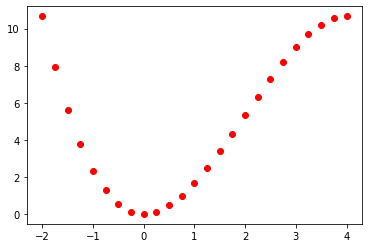

In [7]:

plt.plot(x, y, 'ro')

Let's first try to fit a simple linear model our data. For this we need to estimate the parameters  $ \alpha $ anfd $ \beta $ in the following function.
$$
f:\mathbb R \to \mathbb R, \ y = \alpha + \beta * x
$$

To obtain them we can use the following equations, where the bars on the variables indicate sample mean values.

$$
\beta^* = \frac{Cov(x,y)}{Var(x)}
$$

$$
\alpha^* = \bar{y} - \beta\bar{x}
$$

In [14]:
beta = np.cov(x, y, ddof=0)[0,1] / np.var(x)
beta

1.0541666666666667

In [13]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

In [11]:
y_ = alpha + beta * x
MSE = ((y - y_) ** 2).mean()
MSE

10.721953125

We can now use these calculated values for $\alpha$ and  $\beta$ to try and fit a line to our sample data.

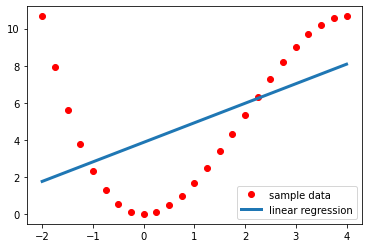

In [15]:
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend()

The model does not seem to follow the data very well. You probably anticipated this disappointing result as we were trying to fit a linear line to a polynomial function. In Python we can use the function `polyfit()` to try different degrees of polynomials. As you can see using a degree of 1 results in our basic linear models we estimated earlier.

deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


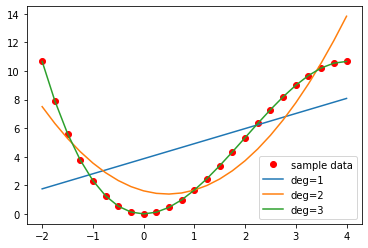

In [17]:
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, y_, label=f'deg={deg}')
plt.legend()

In this case a polynomial function of degree 3 appears fit the sample data perfectly. But what if we didn't want to make asumptions about the form of the relationship. Then neural networks could be useful. Neural nets can approximate a wide range of functional relationships. Prior knowledge of the form of the relationship is generally not required. For our example we are going to use tensorflow and keras to implement a neural network which can train on our sample data. This will be done in five rounds, where after each round the neural net is updated. Each round is plotted and so we can follow the model as it gradually improves. The result is not perfect, but still quite good. Especially taking into consideration the simplicity of the algorithm.

round=1 | MSE=3.87256
round=2 | MSE=0.92527
round=3 | MSE=0.28527
round=4 | MSE=0.13191
round=5 | MSE=0.09568


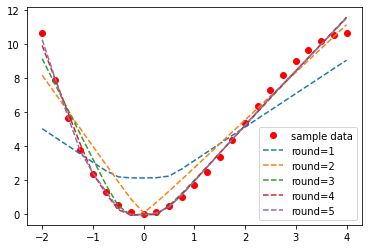

In [18]:
tf.random.set_seed(100)

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ = model.predict(x)
    MSE = ((y-y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend()


As mentioned earlier, a neural net is form agnostic. So we could practically give it any data and it would mostly find an appropriate model. Let's try this with a sample of randomly generated data points and first apply a regression model to it.

deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


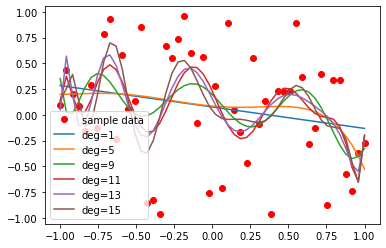

In [19]:
np.random.seed(0)
x = np.linspace(-1, 1)
y = np.random.random(len(x)) * 2 - 1

plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 5, 9, 11, 13, 15]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x, y_, label=f'deg={deg}')
plt.legend()


As expected the polynomial model does a poor job fitting to the data. Now we'll train a neural net and see whether it can generate a good fitting model.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________
round=1 | MSE=0.13428
round=2 | MSE=0.08515
round=3 | MSE=0.05811
round=4 | MSE=0.04389
round=5 | MSE=0.03376
roun

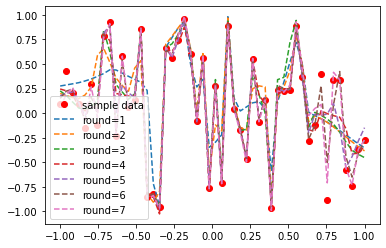

In [20]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

model.summary()

plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_ = model.predict(x)
    MSE = ((y-y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend()

The neural net did a far better job at fitting a model to our data.

:::{admonition} Assignments: :class: hint

Individual -- Reflect on the meaning of this illustration. What does it tell you about the strengths and risks of neural nets? :::